In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plot
%matplotlib inline

In [5]:
col = [ 'Class Name','Left weight','Left distance','Right weight','Right distance']
df=pd.read_csv('balance-scale.data', names=col, sep=',')
df.head()

,Class Name,Left weight,Left distance,Right weight,Right distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


/home/sachin108/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class Name', ylabel='count'>

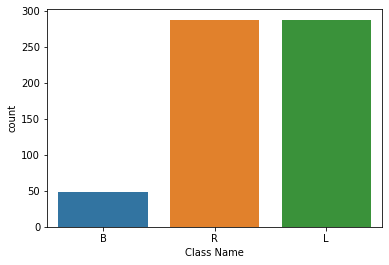

In [6]:
sb.countplot(df['Class Name'])

/home/sachin108/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Left weight', ylabel='count'>

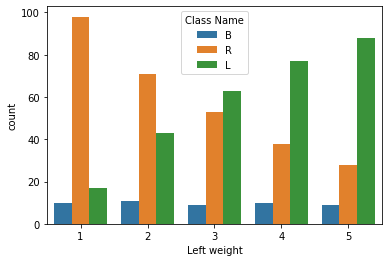

In [7]:
sb.countplot(df['Left weight'] ,hue=df['Class Name'])

/home/sachin108/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Right weight', ylabel='count'>

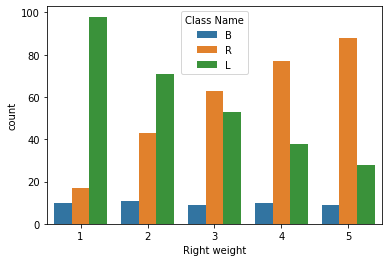

In [8]:
sb.countplot(df['Right weight'], hue=df['Class Name'])

In [9]:
from sklearn.model_selection import train_test_split
x=df.drop('Class Name', axis=1) #parameter axis=1 refer to columns, while 0 refers to rows
y=df[['Class Name']]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3, min_samples_leaf=5)
model.fit(x_train, y_train)

# criterion = The function to measure the quality of a split.
# max_depth = The maximum depth of the tree.
# min_samples_leaf = The minimum number of samples required to be at a leaf node.

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [11]:
y_predict=model.predict(x_test)


In [12]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.7021276595744681

In [13]:
target=list(df['Class Name'].unique())
features=list(x.columns)

In [14]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=features,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

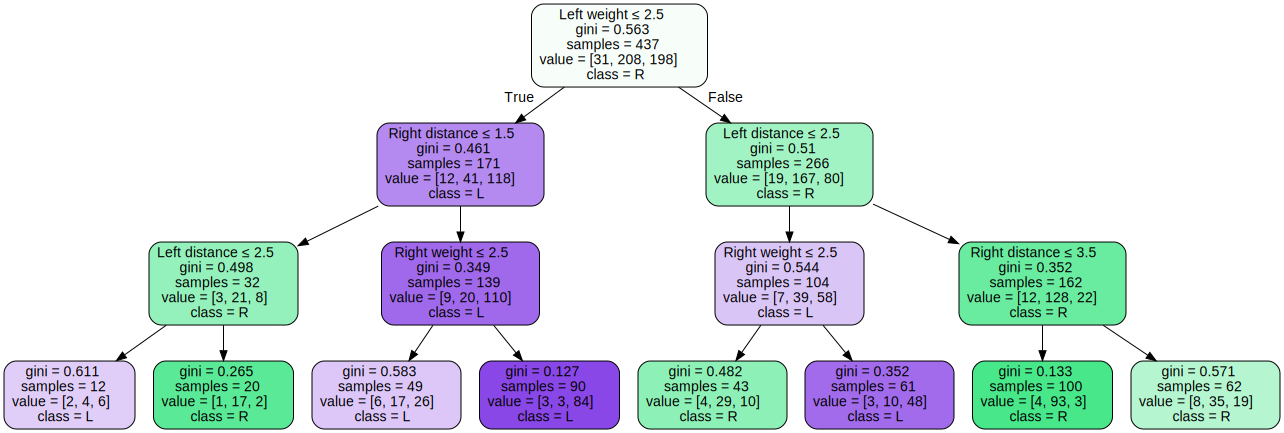

In [15]:
graph